In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [2]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)
data_li_2011 = np.genfromtxt('enso-li2011_v1.txt', delimiter=",", dtype=float) # nino 3.4 reconstruction from NADA data

Time series at each grid point were processed using a 9-yr Lanczos high-pass filter30 to preserve variability in the classical ENSO band of 2–8 years1,2....Li et al 2011

[ 900.  901.  902. ... 2000. 2001. 2002.]


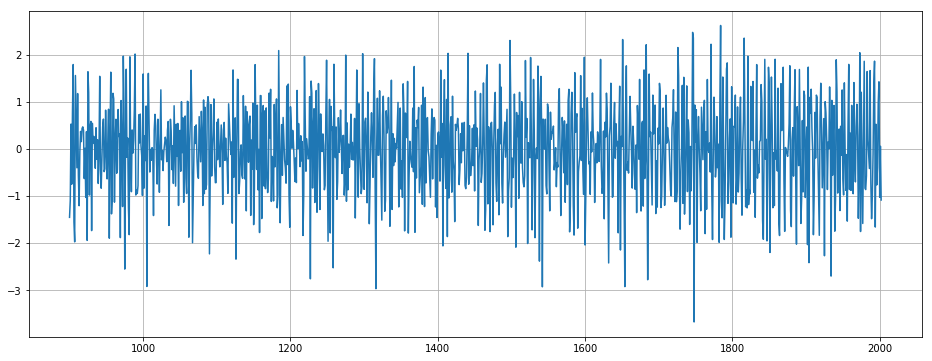

In [3]:
year_li_2011 = data_li_2011[:,0]
nino3_li_2011 = data_li_2011[:,1]
plt.figure(figsize=(16,6))
plt.plot(data_li_2011[:,0], data_li_2011[:,1])
plt.grid()
print(year_li_2011)

In [4]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

0.7861846599384774


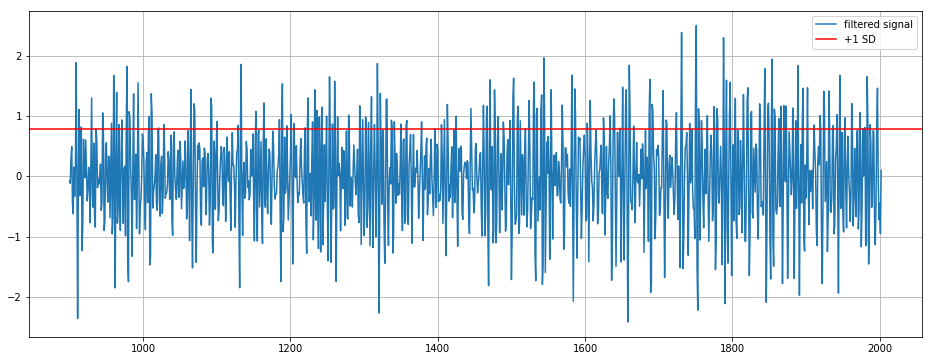

In [5]:
fs = 1 # 120 data points collected per 10 years
lowcut = 1/8
highcut = 1/3
nino3_li_2011_filt = butter_bandpass_filter(nino3_li_2011, lowcut, highcut, fs, order=4)
plt.figure(figsize=(16,6))
plt.plot(year_li_2011, nino3_li_2011_filt, label='filtered signal')
plt.axhline(y=np.std(nino3_li_2011_filt), color='r', linestyle='-', label='+1 SD')
plt.grid()
plt.legend()
print(np.std(nino3_li_2011_filt))

In [6]:
event_en_li = np.zeros((year_li_2011.shape[0]))
event_en_li[nino3_li_2011_filt>=np.std(nino3_li_2011_filt)] = 1.0

In [7]:
event_yy_volc_all = np.zeros((year_li_2011.shape[0]))
event_yy_volc_strong = np.zeros((year_li_2011.shape[0]))
event_yy_volc_all_trop = np.zeros((year_li_2011.shape[0]))
event_yy_volc_all_nh = np.zeros((year_li_2011.shape[0]))
event_yy_volc_all_sh = np.zeros((year_li_2011.shape[0]))
event_yy_volc_strong_trop = np.zeros((year_li_2011.shape[0]))
event_yy_volc_strong_nh = np.zeros((year_li_2011.shape[0]))
event_yy_volc_strong_sh = np.zeros((year_li_2011.shape[0]))

In [8]:
for i in range(year_li_2011.shape[0]):
    #print(event_yy_kobb[i])
    idx = np.asarray(np.where(volc[:,0] == year_li_2011[i]))
    #print(idx.size)
    if idx.size==0:
        continue
    event_yy_volc_all[i] = 1.0
    if np.abs(volc[idx[0,0],2])>=5.0:
        event_yy_volc_strong[i] = 1.0
    
    if volc[idx[0,0],1] == 1.0:
        event_yy_volc_all_trop[i] = 1.0
    if volc[idx[0,0],1] == 2.0:
        event_yy_volc_all_nh[i] = 1.0
    if volc[idx[0,0],1] == 3.0:
        event_yy_volc_all_sh[i] = 1.0
        
    if (volc[idx[0,0],1] == 1.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_trop[i] = 1.0
    if (volc[idx[0,0],1] == 2.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_nh[i] = 1.0
    if (volc[idx[0,0],1] == 3.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_sh[i] = 1.0

In [9]:
np.savetxt('el_nino_li_2011.txt', event_en_li, delimiter=",")
np.savetxt('all_volc_li_2011.txt', event_yy_volc_all, delimiter=",")
np.savetxt('strong_volc_li_2011.txt', event_yy_volc_strong, delimiter=",")
np.savetxt('all_tropical_li_2011.txt', event_yy_volc_all_trop, delimiter=",")
np.savetxt('strong_tropical_li_2011.txt', event_yy_volc_strong_trop, delimiter=",")
np.savetxt('all_nh_li_2011.txt', event_yy_volc_all_nh, delimiter=",")
np.savetxt('strong_nh_li_2011.txt', event_yy_volc_strong_nh, delimiter=",")
np.savetxt('all_sh_li_2011.txt', event_yy_volc_all_sh, delimiter=",")
np.savetxt('strong_sh_li_2011.txt', event_yy_volc_strong_sh, delimiter=",")

In [10]:
print(np.sum(event_yy_volc_all))
print(np.sum(event_yy_volc_strong))
print(np.sum(event_yy_volc_all_trop))
print(np.sum(event_yy_volc_strong_trop))
print(np.sum(event_yy_volc_all_nh))
print(np.sum(event_yy_volc_strong_nh))
print(np.sum(event_yy_volc_all_sh))
print(np.sum(event_yy_volc_strong_sh))

133.0
24.0
40.0
28.0
67.0
4.0
26.0
0.0


In [11]:
# Bootstrap
N = 1000
win = 5
count_elnino_all_volc = np.zeros((N, win))
count_elnino_strong_volc  = np.zeros((N, win))
count_elnino_all_trop  = np.zeros((N, win))
count_elnino_strong_trop  = np.zeros((N, win))
count_elnino_all_nh  = np.zeros((N, win))
count_elnino_strong_nh  = np.zeros((N, win))
count_elnino_all_sh  = np.zeros((N, win))

In [12]:
idx_all = np.asarray(np.where(event_yy_volc_all == 1.0))
idx_strong = np.asarray(np.where(event_yy_volc_strong == 1.0))
idx_all_trop = np.asarray(np.where(event_yy_volc_all_trop == 1.0))
idx_strong_trop = np.asarray(np.where(event_yy_volc_strong_trop == 1.0))
idx_all_nh = np.asarray(np.where(event_yy_volc_all_nh == 1.0))
idx_strong_nh = np.asarray(np.where(event_yy_volc_strong_nh == 1.0))
idx_all_sh = np.asarray(np.where(event_yy_volc_all_sh == 1.0))

In [13]:
print(idx_all[0])

[   0    4    8   16   29   39   46   53   58   60   70   76   82   90
   98  103  111  117  120  128  139  157  164  167  192  208  215  218
  227  237  271  280  282  291  300  310  322  330  336  358  362  369
  376  386  406  429  436  441  445  478  481  489  508  514  516  541
  548  553  558  563  570  577  578  580  602  605  612  628  637  641
  654  667  676  685  690  695  701  719  721  737  741  746  754  762
  767  773  793  795  808  819  820  821  825  829  839  856  862  866
  870  883  886  896  897  909  915  921  923  932  936  946  953  956
  962  973  975  984  987  990 1003 1008 1012 1019 1025 1026 1031 1043
 1047 1057 1064 1068 1079 1082 1091]


In [14]:
nino3_li_2011_filt_norm = (nino3_li_2011_filt - np.mean(nino3_li_2011_filt))/(np.std(nino3_li_2011_filt))
niter = 0
while niter<N:
    rand_year_all = random.sample(list(idx_all[0]), 1)
    if (rand_year_all[0]<nino3_li_2011_filt_norm.shape[0]-win):
        count_elnino_all_volc[niter,:] = nino3_li_2011_filt_norm[rand_year_all[0]:rand_year_all[0]+win]
    
    rand_year_strong = random.sample(list(idx_strong[0]), 1)
    if (rand_year_strong[0]<nino3_li_2011_filt_norm.shape[0]-win):
        count_elnino_strong_volc[niter,:] = nino3_li_2011_filt_norm[rand_year_strong[0]:rand_year_strong[0]+win]
    
    rand_year_all_trop = random.sample(list(idx_all_trop[0]), 1)
    if (rand_year_all_trop[0]<nino3_li_2011_filt_norm.shape[0]-win):
        count_elnino_all_trop[niter,:] = nino3_li_2011_filt_norm[rand_year_all_trop[0]:rand_year_all_trop[0]+win]

    rand_year_strong_trop = random.sample(list(idx_strong_trop[0]), 1)
    if (rand_year_strong_trop[0]<nino3_li_2011_filt_norm.shape[0]-win):
        count_elnino_strong_trop[niter,:] = nino3_li_2011_filt_norm[rand_year_strong_trop[0]:rand_year_strong_trop[0]+win]

    rand_year_all_nh = random.sample(list(idx_all_nh[0]), 1)
    if (rand_year_all_nh[0]<nino3_li_2011_filt_norm.shape[0]-win):
        count_elnino_all_nh[niter,:] = nino3_li_2011_filt_norm[rand_year_all_nh[0]:rand_year_all_nh[0]+win]

    rand_year_strong_nh = random.sample(list(idx_strong_nh[0]), 1)
    if (rand_year_strong_nh[0]<nino3_li_2011_filt_norm.shape[0]-win):
        count_elnino_strong_nh[niter,:] = nino3_li_2011_filt_norm[rand_year_strong_nh[0]:rand_year_strong_nh[0]+win]

    rand_year_all_sh = random.sample(list(idx_all_sh[0]), 1)
    if (rand_year_all_sh[0]<nino3_li_2011_filt_norm.shape[0]-win):
        count_elnino_all_sh[niter,:] = nino3_li_2011_filt_norm[rand_year_all_sh[0]:rand_year_all_sh[0]+win]
    
    #print(s[rand_year_all[0]:rand_year_all[0]+win])
    #print(rand_year_all[0])
    niter = niter + 1 

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


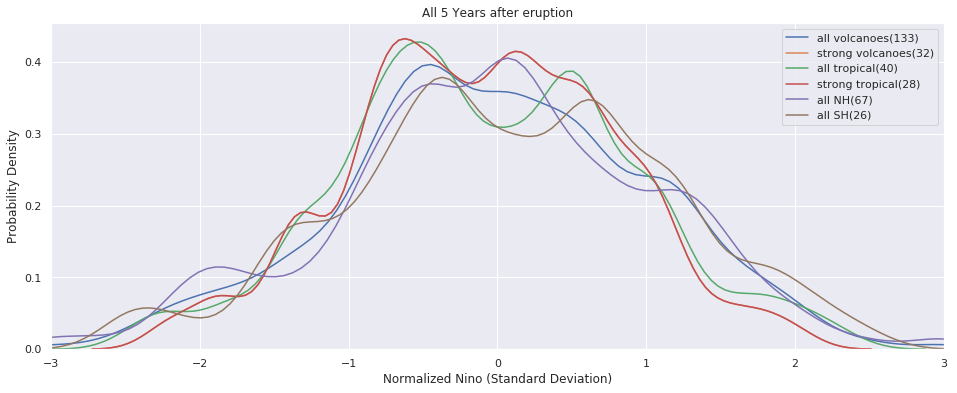

In [15]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc.flatten(), label='all volcanoes(133)')
sns.kdeplot(count_elnino_strong_volc.flatten(), label='strong volcanoes(32)')
sns.kdeplot(count_elnino_all_trop.flatten(), label='all tropical(40)')
sns.kdeplot(count_elnino_strong_volc.flatten(), label='strong tropical(28)')
sns.kdeplot(count_elnino_all_nh.flatten(), label='all NH(67)')
#sns.kdeplot(count_elnino_strong_nh.flatten(), label='strong NH(4)')
sns.kdeplot(count_elnino_all_sh.flatten(), label='all SH(26)')
plt.title('All 5 Years after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


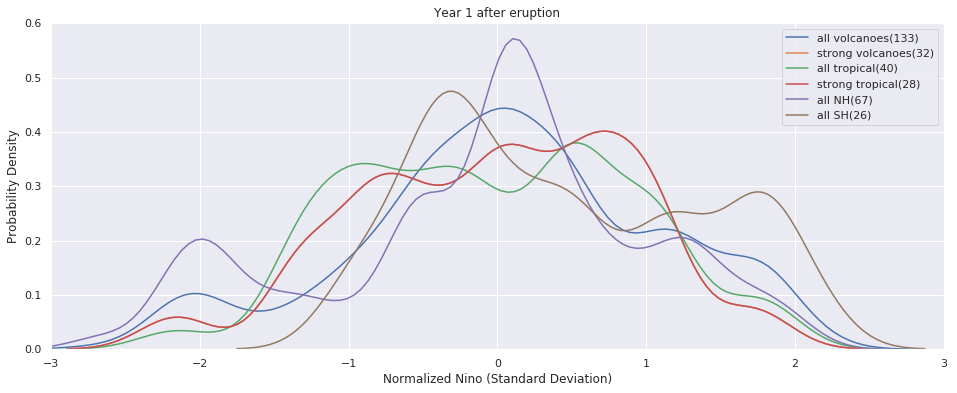

In [16]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,0], label='all volcanoes(133)')
sns.kdeplot(count_elnino_strong_volc[:,0], label='strong volcanoes(32)')
sns.kdeplot(count_elnino_all_trop[:,0], label='all tropical(40)')
sns.kdeplot(count_elnino_strong_volc[:,0], label='strong tropical(28)')
sns.kdeplot(count_elnino_all_nh[:,0], label='all NH(67)')
#sns.kdeplot(count_elnino_strong_nh[:,0], label='strong NH(4)')
sns.kdeplot(count_elnino_all_sh[:,0], label='all SH(26)')
plt.title('Year 1 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


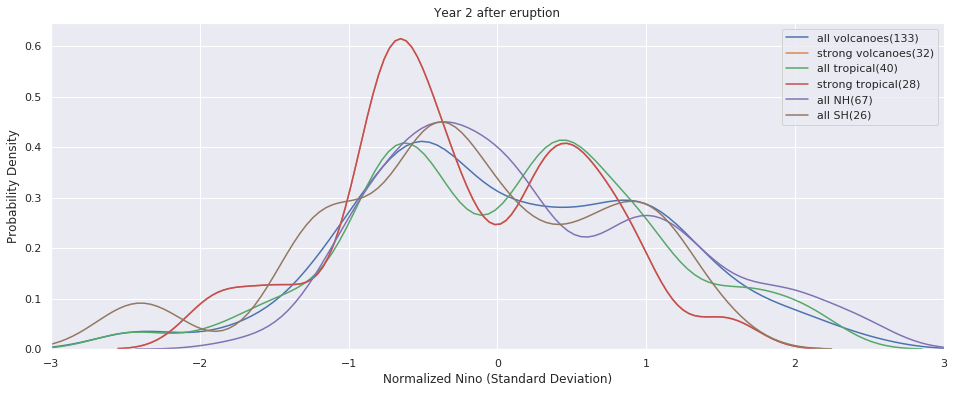

In [17]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,1], label='all volcanoes(133)')
sns.kdeplot(count_elnino_strong_volc[:,1], label='strong volcanoes(32)')
sns.kdeplot(count_elnino_all_trop[:,1], label='all tropical(40)')
sns.kdeplot(count_elnino_strong_volc[:,1], label='strong tropical(28)')
sns.kdeplot(count_elnino_all_nh[:,1], label='all NH(67)')
#sns.kdeplot(count_elnino_strong_nh[:,1], label='strong NH(4)')
sns.kdeplot(count_elnino_all_sh[:,1], label='all SH(26)')
plt.title('Year 2 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


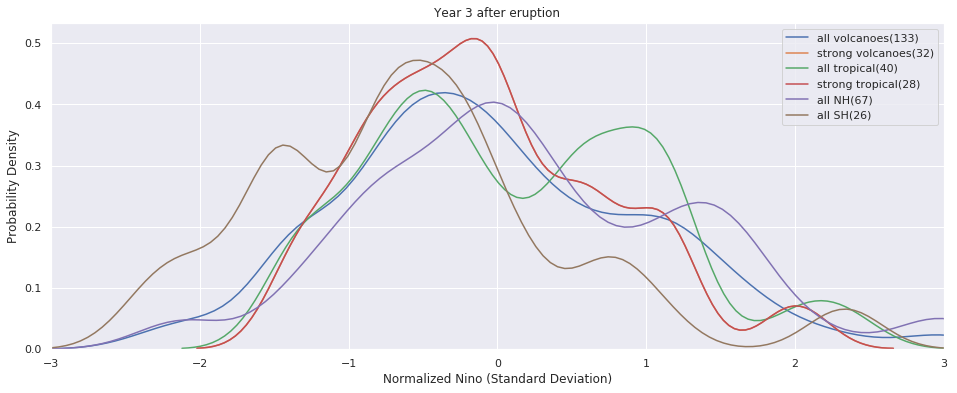

In [18]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,2], label='all volcanoes(133)')
sns.kdeplot(count_elnino_strong_volc[:,2], label='strong volcanoes(32)')
sns.kdeplot(count_elnino_all_trop[:,2], label='all tropical(40)')
sns.kdeplot(count_elnino_strong_volc[:,2], label='strong tropical(28)')
sns.kdeplot(count_elnino_all_nh[:,2], label='all NH(67)')
#sns.kdeplot(count_elnino_strong_nh[:,2], label='strong NH(4)')
sns.kdeplot(count_elnino_all_sh[:,2], label='all SH(26)')
plt.title('Year 3 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


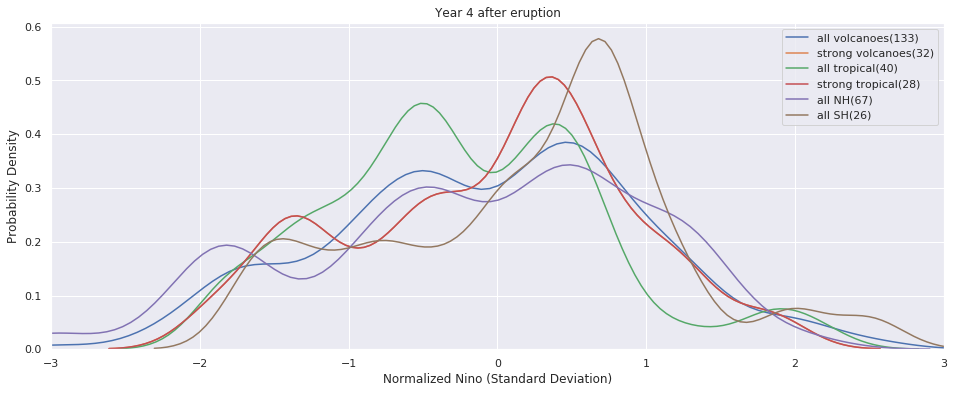

In [19]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,3], label='all volcanoes(133)')
sns.kdeplot(count_elnino_strong_volc[:,3], label='strong volcanoes(32)')
sns.kdeplot(count_elnino_all_trop[:,3], label='all tropical(40)')
sns.kdeplot(count_elnino_strong_volc[:,3], label='strong tropical(28)')
sns.kdeplot(count_elnino_all_nh[:,3], label='all NH(67)')
#sns.kdeplot(count_elnino_strong_nh[:,3], label='strong NH(4)')
sns.kdeplot(count_elnino_all_sh[:,3], label='all SH(26)')
plt.title('Year 4 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

In [20]:
nino3_li_2011_anom_yy = np.zeros((nino3_li_2011_filt.shape[0],3))
nino3_li_2011_anom_yy[:,0] = year_li_2011[:]
nino3_li_2011_anom_yy[:,1] = event_yy_volc_strong[:]
nino3_li_2011_anom_yy[:,2] = nino3_li_2011_filt[:]
np.savetxt('nino3_li_2011_anom_yy.txt', nino3_li_2011_anom_yy, delimiter=",")